# Pymaceuticals Inc.
---

### Analysis
* Your analysis here ...

In [242]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import random
from scipy.stats import linregress

random.seed(42)

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df=pd.merge(study_results,mouse_metadata,on="Mouse ID",how="left")


In [243]:
# Display the data table for preview
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [244]:
# Checking the number of mice.
num_mouse=len(df["Mouse ID"].unique())
num_mouse

249

In [245]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = df['Mouse ID'][df.duplicated(['Mouse ID','Timepoint'])]
duplicates.iloc[1]

'g989'

In [246]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicateRows=df.loc[df["Mouse ID"]=="g989"]
duplicateRows

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [247]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df=df.loc[df["Mouse ID"]!="g989"]
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [248]:
# Checking the number of mice in the clean DataFrame.
df=df.loc[df["Mouse ID"]!="g989"]
num=len(df["Mouse ID"].unique())
num

248

## Summary Statistics

In [249]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
grouped=df.groupby(['Drug Regimen'])
n1=grouped["Tumor Volume (mm3)"].mean()
n1=n1.rename("Mean Tumor Volume")
n2=grouped["Tumor Volume (mm3)"].median()
n2=n2.rename("Median Tumor Volume")
n3=grouped["Tumor Volume (mm3)"].var()
n3=n3.rename("Tumor Volume Variance")
n4=grouped["Tumor Volume (mm3)"].std()
n4=n4.rename("Tumor Volume Std. Dev.")
n5=grouped["Tumor Volume (mm3)"].sem()
n5=n5.rename("Tumor Volume Std. Err.")
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
info=pd.concat([n1,n2,n3,n4,n5],axis=1)
info


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [270]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
stat=grouped["Tumor Volume (mm3)"].agg(["mean","median","var","std","sem"])
stat


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

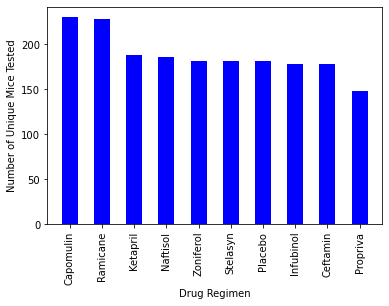

In [279]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
p1=grouped['Mouse ID'].count().sort_values(ascending=False)
p1.plot(kind="bar",xlabel="Drug Regimen",ylabel="Number of Unique Mice Tested",color='b')
plt.xlim(-0.7,9.7)
plt.show()


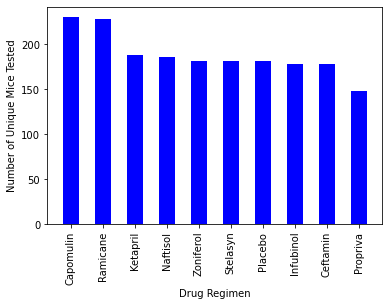

In [273]:
# Generate a bar plot showing the total number of unqiue mice tested on each drug regimen using using pyplot.
from importlib import reload
reload(plt)
x_axis=[x for x in range(len(grouped["Drug Regimen"].unique()))]
y_axis=p1
plt.bar(x_axis,y_axis,color="b",align="center",width=0.5)
plt.xticks(x_axis,p1.index[0:10],rotation="vertical")
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Unique Mice Tested')
plt.show()



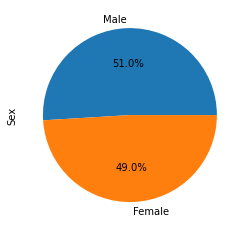

In [253]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gen=df["Sex"].value_counts()
gen.plot(kind="pie",autopct="%1.1f%%")
plt.show()




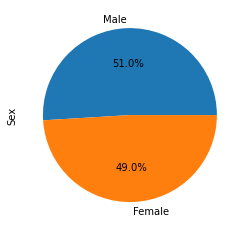

In [254]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gen,autopct="%1.1f%%", labels=["Male","Female"])
plt.ylabel("Sex")
plt.show()



## Quartiles, Outliers and Boxplots

In [255]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
grouped_id=df.groupby(["Mouse ID"])
max_time=grouped_id["Timepoint"].max()
max_time=max_time.rename("Timepoint")


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
new_df=pd.merge(max_time,df,how="left",on=["Mouse ID","Timepoint"])
new_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [256]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    mouse_list=new_df.loc[new_df["Drug Regimen"]==drug]
    total_tumor=mouse_list["Tumor Volume (mm3)"]
    # add subset 
    tumor_vol_list.append(total_tumor)
    # Determine outliers using upper and lower bounds
    quartiles = total_tumor.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers=mouse_list.loc[(mouse_list["Tumor Volume (mm3)"]<lower_bound) | (mouse_list["Tumor Volume (mm3)"]>upper_bound)]
    print(f"{drug}'s potential outliers: {outliers['Mouse ID']} {outliers['Tumor Volume (mm3)']}")

Capomulin's potential outliers: Series([], Name: Mouse ID, dtype: object) Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Mouse ID, dtype: object) Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    c326
Name: Mouse ID, dtype: object 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Mouse ID, dtype: object) Series([], Name: Tumor Volume (mm3), dtype: float64)


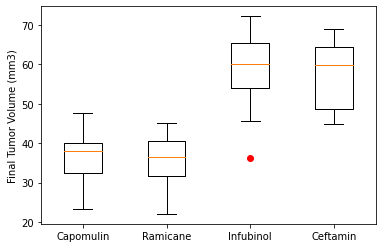

In [257]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumor_vol_list,sym="r")
ax1.set_xticklabels(treatment_list)
plt.show()


## Line and Scatter Plots

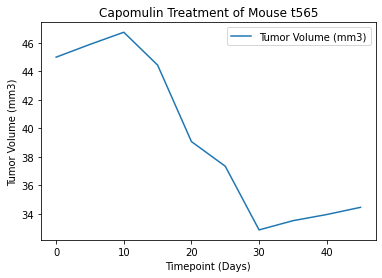

In [258]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
cap=df.loc[df["Drug Regimen"]=="Capomulin"]
cap_id=cap["Mouse ID"].unique()
rand_cap=cap_id[random.randint(0,len(cap_id))]
rand_cap_info=cap.loc[cap["Mouse ID"]==rand_cap]
rand_cap_info=rand_cap_info[["Timepoint","Tumor Volume (mm3)"]]
rand_cap_info.plot(kind="line",x="Timepoint",y="Tumor Volume (mm3)")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse "+rand_cap)
plt.show()



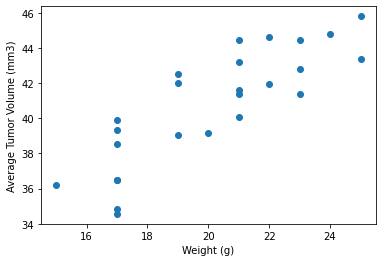

In [259]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_grp_id=cap.groupby(["Mouse ID"])
x=cap_grp_id["Weight (g)"].mean()
y=cap_grp_id["Tumor Volume (mm3)"].mean()
plt.scatter(x,y)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()



## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


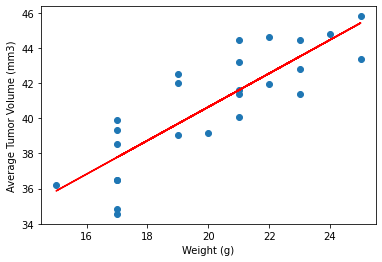

In [265]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr=st.pearsonr(x,y)
print(f"The correlation between mouse weight and the average tumor volume is {round(corr[0],2)}")
(slp,inter,rval,pval,stdev)=linregress(x,y)
regress_values = x * slp + inter
plt.scatter(x,y)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.plot(x,regress_values,"r-")
plt.show()
